In [13]:
import xlwings as xw #library to controll excel

In [14]:
new_book = xw.Book() #creates new excel book and opens it

In [15]:
#how about creating a new worksheet in the book?
inputs = new_book.sheets.add("inputs")

In [16]:
#why am I getting index zero? 
#sheets method returns a list 
worksheet = new_book.sheets[0]

In [17]:
new_book.sheets

Sheets([<Sheet [Book1]inputs>, <Sheet [Book1]Sheet1>])

In [18]:
#whenever I want to do something to my worksheet I simply call the variable 
#I want to write something in my excel
worksheet.range("A1").value = "Hello, how are you"

In [19]:
#let's do some formatting
worksheet.range("A1").color = (0,100,100)
worksheet.range("A1").column_width = 50

In [20]:
worksheet.range("A1").clear_contents()
#instead of clear content you can also just do clear
#clear both the content and the formatting
worksheet.range("A1").clear()

In [21]:
# can we use python to read the contents in exxel?
name = worksheet.range("C3").value
age = worksheet.range("C4").value
hobby = worksheet.range("C5").value
print(name)
print(age)
print(hobby)

None
None
None


In [22]:
#NEVER EVER reference things explicitely -> name the cells in excel!!

In [23]:
name = worksheet.range("name").value   
age = worksheet.range("age").value
hobby = worksheet.range("hobby").value
print(name)
print(age)
print(hobby)
# creates error here because I didn't save the excel worksheet with name, age..

com_error: (-2147352567, 'Exception occurred.', (0, None, None, None, 0, -2146827284), None)

In [24]:
# now is the time we are going to do our report
# library pandas
import pandas as pd
orders = pd.read_excel("Sample - Superstore.xls", sheet_name = "Orders")

In [25]:
# the .head method simply returns the top 5 rows
orders.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [26]:
returns = pd.read_excel("Sample - Superstore.xls", sheet_name = "Returns")
returns.head()

Returned        Order ID
0      Yes  CA-2014-153822
1      Yes  CA-2014-129707
2      Yes  CA-2011-152345
3      Yes  CA-2012-156440
4      Yes  US-2014-155999

In [27]:
# the logic to apply is that we only want the orders whose ID appears in the returns table
# let's perform this join or "VLookup" in excel
# the merge method is what will connect both tables
returned_orders = orders.merge(returns, on = "Order ID")

In [28]:
# let's see how much value of sales we had to return py product category
returned_categories = returned_orders.groupby("Category")["Sales","Profit"].sum()

C:\Users\h_wei\AppData\Local\Temp\ipykernel_17204\2912641748.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  returned_categories = returned_orders.groupby("Category")["Sales","Profit"].sum()


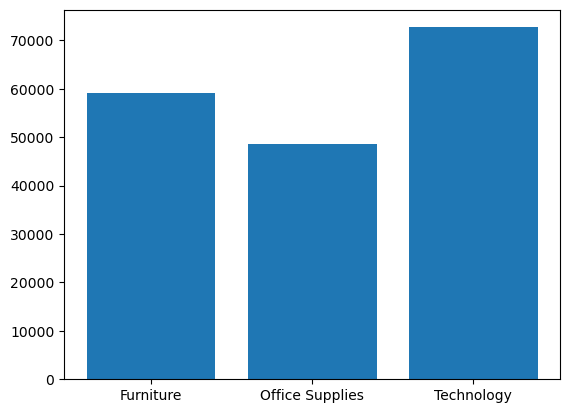

In [29]:
# now let's perform a graph of this
import matplotlib.pyplot as plt
# plot the value of sales returned
fig = plt.figure()
plt.bar(x = returned_categories.index, height = returned_categories["Sales"])

# lets save the figure
plt.savefig("analysis.png")

In [30]:
#  how do I now put this chart back to excel?
book = xw.Book("Sample - Superstore.xls")

In [31]:
book.sheets.add("graph")

<Sheet [Sample - Superstore.xls]graph>

In [32]:
book.sheets

Sheets([<Sheet [Sample - Superstore.xls]Orders>, <Sheet [Sample - Superstore.xls]Returns>, <Sheet [Sample - Superstore.xls]graph>, ...])

In [33]:
target_sheet = book.sheets[2]

In [34]:
target_sheet.pictures.add(fig, name = "myplot" )

<Picture 'myplot' in <Sheet [Sample - Superstore.xls]graph>>

In [35]:
# imagine this was all my analysis!! now lets generate a word document out of it
# first of all we call once again the relevant package
from docx import Document
# creating a new word document object in python
document = Document()

document.add_heading("Top secret report, highly classified", level = 0)

document.add_heading("Executive Summary", level = 1)

document.add_paragraph("The figue belows shows the values of returned sales by product category")

document.add_picture("analysis.png")

document.save("amazing_report.docx")

In [36]:
# now is the time to send it by email!!
# outlook needs to be installed and set up for this
# special package that only works on windows
import win32com.client as win32

outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)
# creating a new email object

email.To = "pedro.carneiro@ironhack.com"
email.Subject = "This is a serious weekly report"
email.Body = """Dear all,
                Please find attached my amazing report
                I want a raise 
                Thank you
                Pedro"""
# last step send with attachments 
email.Attachments.Add(Source=r"C:\Users\h_wei\OneDrive\Dokumente\GitHub\Ironhack_Labs\amazing_report.docx")
email.Send()
# What is R in file path Python?
# It just means raw string in Python. Meaning that whatever is inside the string, is the string

com_error: (-2147467260, 'Operation aborted', None, None)

In [ ]:
#for those who prefer gmail!! I got you covered
#don't forget this
# go to the email account from where you want to send (on gmail)
# https://myaccount.google.com/lesssecureapps

import smtplib

server = smtplib.SMTP("smtp.gmail.com:587")
server.ehlo()
server.starttls()
server.login("peterramironhack@gmail.com", "unicorns123#") #unicorns is password for gmail

# send the mail
msg = "Hello!" #the /n separates the message from the headers
server.sendmail("peterramironhack@gmail.com", "pedroernie19@gmail.com", msg)

server.quit()